In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
# Load the data splits
train_data = pd.read_csv('../mcats/data/train_data.csv')
val_data = pd.read_csv('../mcats/data/test_data.csv')
test_data = pd.read_csv('../mcats/data/val_data.csv')

# Split the data into X and y
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_val = val_data.iloc[:, 1:-1]
y_val = val_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

In [3]:
knn = KNeighborsClassifier()

In [6]:
knn.fit(X_train, y_train)
preds = knn.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.96      0.99      0.97       477
   classical       0.97      0.96      0.96       437
         pop       0.96      0.96      0.96       423
  electronic       0.98      0.96      0.97       424
       metal       0.98      0.98      0.98       443
        rock       0.98      0.96      0.97       450
     country       0.96      0.96      0.96       419
      reggae       0.97      1.00      0.98       457

    accuracy                           0.97      3530
   macro avg       0.97      0.97      0.97      3530
weighted avg       0.97      0.97      0.97      3530



In [7]:
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.57      0.54       140
   classical       0.89      0.83      0.86       172
         pop       0.37      0.36      0.36       164
  electronic       0.47      0.32      0.38       148
       metal       0.58      0.72      0.64       122
        rock       0.33      0.27      0.29       154
     country       0.45      0.50      0.48       119
      reggae       0.49      0.58      0.53       155

    accuracy                           0.52      1174
   macro avg       0.51      0.52      0.51      1174
weighted avg       0.52      0.52      0.51      1174



In [13]:
#Finding a best value of k for better accuracy

k_range=range(1,26)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

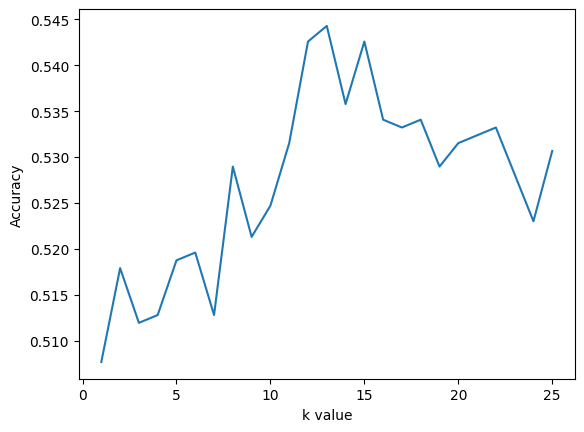

In [14]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

In [22]:
options=['uniform', 'distance']
algorithms=['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = dict(n_neighbors=k_range, weights=options, algorithm=algorithms)

knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, y_train)
rand.grid_scores_

AttributeError: 'RandomizedSearchCV' object has no attribute 'grid_scores_'

In [ ]:
print(rand.best_score_)
print(rand.best_params_)